In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [2]:
data = pd.read_excel("ex2.xlsx")
print(data.shape)
data.head

(36, 4)


<bound method NDFrame.head of          Disease  Age  Gender Smoker status
0       diseased   43    Male        Smoker
1   not diseased   18    Male        Smoker
2       diseased   22  Female    Non-smoker
3       diseased   25    Male    Non-smoker
4   not diseased   45  Female        Smoker
5   not diseased   12    Male    Non-smoker
6       diseased   23    Male        Smoker
7       diseased   33    Male        Smoker
8   not diseased   27    Male    Non-smoker
9   not diseased   27  Female    Non-smoker
10      diseased   48  Female        Smoker
11      diseased   34  Female        Smoker
12      diseased   32  Female        Smoker
13      diseased   66    Male        Smoker
14  not diseased   24    Male        Smoker
15      diseased   34    Male    Non-smoker
16  not diseased   27    Male    Non-smoker
17  not diseased   34  Female        Smoker
18      diseased   55    Male        Smoker
19      diseased   65    Male        Smoker
20      diseased   44    Male        Smoker
21

In [3]:
data.isnull().sum()

Disease          0
Age              0
Gender           0
Smoker status    0
dtype: int64

In [4]:
feature_cols = ['Disease','Age','Gender','Smoker status']
x = data[feature_cols]
y = data['Disease']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(28, 4)

(28,)

(8, 4)

(8,)

In [6]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)

In [7]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

ValueError: could not convert string to float: 'not diseased'

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score : ", Accuracy_score)
print('Accuracy Score in percentage : ', int(Accuracy_score*100), "%")

Confusion Matrix :  [[54  0]
 [ 0 26]]
Accuracy Score :  1.0
Accuracy Score in percentage :  100 %


<Axes: xlabel='Predicted', ylabel='Actual'>

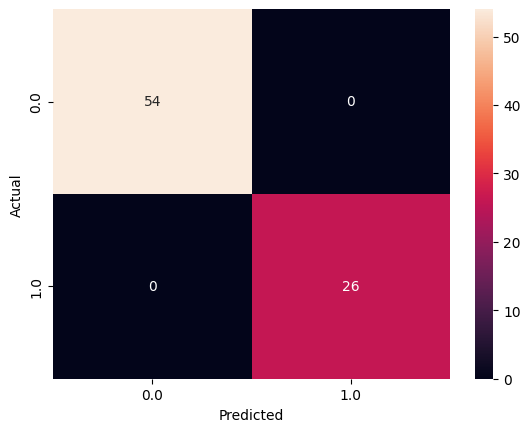

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)